## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [1]:
import pandas as pd
import numpy as np

In [2]:
student=pd.read_csv("students-data.data")
#student=pd.read_csv("students-data.csv")
#student.sample(10)
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [3]:
#student_df=student.set_index(0)
#student_df.rename_axis(index={1: 'numbers'})
student_df=student.rename_axis('numbers')
#student
student_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
numbers,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7


## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [4]:
df1=student_df.select_dtypes(include='object')
df1

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
numbers,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [5]:
print(np.var(student_df))
#drop traveltime, studytime, failures, famrel, freetime, Dalc:::Variance of these is less than 1
df2=student_df.drop(['traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc'], axis=1)
print(df2)

age            1.624163
Medu           1.195411
Fedu           1.181183
traveltime     0.485281
studytime      0.702541
failures       0.551617
famrel         0.801961
freetime       0.995199
goout          1.236251
Dalc           0.791412
Walc           1.654478
health         1.928050
absences      63.887390
G1            10.989162
G2            14.113097
G3            20.936478
dtype: float64
        school sex  age address famsize Pstatus  Medu  Fedu      Mjob  \
numbers                                                                 
0           GP   F   18       U     GT3       A     4     4   at_home   
1           GP   F   17       U     GT3       T     1     1   at_home   
2           GP   F   15       U     LE3       T     1     1   at_home   
3           GP   F   15       U     GT3       T     4     2    health   
4           GP   F   16       U     GT3       T     3     3     other   
...        ...  ..  ...     ...     ...     ...   ...   ...       ...   
390         MS   

In [6]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Walc,395.0,2.291139,1.287897,1.0,1.0,2.0,3.0,5.0
health,395.0,3.554430,1.390303,1.0,3.0,4.0,5.0,5.0
absences,395.0,5.708861,8.003096,0.0,0.0,4.0,8.0,75.0
G1,395.0,10.908861,3.319195,3.0,8.0,11.0,13.0,19.0
G2,395.0,10.713924,3.761505,0.0,9.0,11.0,13.0,19.0
G3,395.0,10.415190,4.581443,0.0,8.0,11.0,14.0,20.0


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [7]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
#student_df['sex']= label_encoder.fit_transform(student_df['sex'])
df3=df2.apply(label_encoder.fit_transform)
df3.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
numbers,,,,,,,,,,,,,,,,,,,,,
0,0,0,3,1,0,0,4,4,0,4,...,1,0,0,3,0,2,6,2,3,3
1,0,0,2,1,0,1,1,1,0,2,...,1,1,0,2,0,2,4,2,2,3
2,0,0,0,1,1,1,1,1,0,2,...,1,1,0,1,2,2,10,4,5,7
3,0,0,0,1,0,1,4,2,1,3,...,1,1,1,1,0,4,2,12,11,12
4,0,0,1,1,0,1,3,3,2,2,...,1,0,0,1,1,4,4,3,7,7


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [8]:
#pd.DataFrame(np.where(df3 >= 10, 1, 0), columns=df3.columns)# refine your answer
df3['G1_val']=pd.DataFrame(np.where(df3['G1']  >= 10, 1, 0))
df3['G2_val']=pd.DataFrame(np.where(df3['G2']  >= 10, 1, 0))    
df3['G3_val']=pd.DataFrame(np.where(df3['G3']  >= 10, 1, 0))

df3.drop(columns=['G1','G2','G3'])
df3.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Walc,health,absences,G1,G2,G3,G1_val,G2_val,G3_val
numbers,,,,,,,,,,,,,,,,,,,,,
0,0,0,3,1,0,0,4,4,0,4,...,3,0,2,6,2,3,3,0,0,0
1,0,0,2,1,0,1,1,1,0,2,...,2,0,2,4,2,2,3,0,0,0
2,0,0,0,1,1,1,1,1,0,2,...,1,2,2,10,4,5,7,0,0,0
3,0,0,0,1,0,1,4,2,1,3,...,1,0,4,2,12,11,12,1,1,1
4,0,0,1,1,0,1,3,3,2,2,...,1,1,4,4,3,7,7,0,0,0


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [9]:
X = df3.iloc[:,:26]
print(X)
y = df3.iloc[:,26:27]
print(y)

         school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
numbers                                                                        
0             0    0    3        1        0        0     4     4     0     4   
1             0    0    2        1        0        1     1     1     0     2   
2             0    0    0        1        1        1     1     1     0     2   
3             0    0    0        1        0        1     4     2     1     3   
4             0    0    1        1        0        1     3     3     2     2   
...         ...  ...  ...      ...      ...      ...   ...   ...   ...   ...   
390           1    1    5        1        1        0     2     2     3     3   
391           1    1    2        1        1        1     3     1     3     3   
392           1    1    6        0        0        1     1     1     2     2   
393           1    1    3        0        1        1     3     2     3     2   
394           1    1    4        1      

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
#df3['G2'].value_counts().plot(kind='kde')
#sns.jointplot(x='G2', y='G3', data=df3, kind="reg")
sns.relplot(x='G3', y='G2', data=df3,  hue='G2')


#From G3 being target and G2 being independent variable, we can see that (G3=0 @ G2<8). This means that unless the G2 score
#is (>=8) G3 will be in fail list. So it will be easy to separate out the individual performance with G3 score, depending on G2 score.

In [11]:
#df3['G2'].value_counts().plot(kind='kde')


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

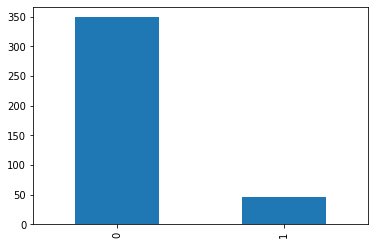

In [12]:
#Number of students in each school. 0=GP and 1=MS
pd.value_counts(df3['school']).plot(kind="bar")

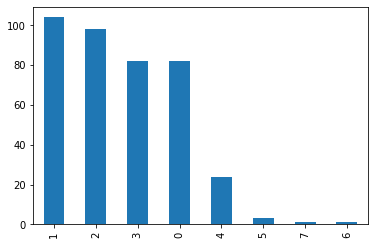

In [13]:
#Number of students with different ages viz, 1 to 6
pd.value_counts(df3['age']).plot(kind="bar")

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [14]:
from sklearn.model_selection import train_test_split
y=df3.iloc[:,26:27]
X = df3.iloc[:,:26]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=2)
print("training set:::X_train***\n\n",X_train,"\n\n***y_train*****\n\n", y_train)
print("test dataset***\n\n", X_test,"\n\n******************",y_test)

training set:::X_train***

          school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
numbers                                                                        
10            0    0    0        1        0        1     4     4     4     1   
112           0    0    1        1        0        1     2     2     0     2   
338           0    0    3        1        1        1     3     3     3     3   
292           0    0    3        1        1        1     2     1     3     0   
305           0    0    3        1        0        1     2     4     3     0   
...         ...  ...  ...      ...      ...      ...   ...   ...   ...   ...   
299           0    1    3        1        1        1     4     4     4     4   
22            0    1    1        1        1        1     4     2     4     2   
72            0    0    0        0        0        1     1     1     2     2   
15            0    0    1        1        0        1     4     4     1     2   
168         

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [15]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

#Building Logistic Regression Model
LoRegression_model = LogisticRegression()

#Using sklear.fit()
LoRegression_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
#Using sklearn.predict()
y_pred=LoRegression_model.predict(X_test)
print(y_pred)

[11 15  8 12 12  5  7  6  7  7 12 12  7  7  8 12  7 10 12  7 12  0  7 13
 12 11 11  0  7 10  7  7  8 12  3  8  0  7  8  8  8  7  7  7  7  0 11  7
 12  0  0 11  0 10  0  7 12  0  5  7 12  0  7  7  0  7  7  6 15  5  0 13
  9  8 11  9  7 13  6  3  2  8 12 13  5 10  0 11 12 10  6 12 11  8 12 11
 12  8  7  0 11 12  5 12  8  0  0  7  7  4  5  4  6  0 10  7  6 11 10]


In [17]:
#Accuracy of Training and Testing sets

print("Testing Accuracy")
print(LoRegression_model.score(X_test,y_test))
print("\nTraining Accuracy")
print(LoRegression_model.score(X_train,y_train))

Testing Accuracy
0.2773109243697479

Training Accuracy
0.5688405797101449


In [18]:
#F1 score = 2 * (precision * recall) / (precision + recall)
#from sklearn.metrics import f1_score
from sklearn import metrics
predicted = LoRegression_model.predict(X_test)
expected = y_test
print(metrics.classification_report(expected, predicted))
#print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        11
           2       0.00      0.00      0.00         1
           3       0.50      0.20      0.29         5
           4       0.00      0.00      0.00         0
           5       0.33      0.15      0.21        13
           6       0.00      0.00      0.00         9
           7       0.29      0.40      0.33        20
           8       0.42      0.29      0.34        17
           9       0.50      0.09      0.15        11
          10       0.14      0.12      0.13         8
          11       0.18      0.29      0.22         7
          12       0.11      0.33      0.16         6
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         3

    accuracy                           0.28       119
   macro avg       0.21      0.19      0.18       119
weighted avg       0.30   

# Naive bayes with Iris data

### Import Iris.csv

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
Iris=pd.read_csv("iris.csv")
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
#Replacing Nan with 0s
Iris_df=Iris.fillna(0)
Iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica
150,151,5.9,0.0,0.0,0.0,Iris-virginica


In [21]:
from sklearn import preprocessing as prep
le=prep.LabelEncoder()
#Converting species class into 0,1,2 
Iris_df['Species']=le.fit_transform(Iris_df['Species'])
Iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2
150,151,5.9,0.0,0.0,0.0,2


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [22]:
X=Iris_df.iloc[:,:5]
y=Iris_df.iloc[:,5:6]

X, y

(      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 0      1            5.1           3.5            1.4           0.2
 1      2            4.9           3.0            1.4           0.2
 2      3            4.7           3.2            1.3           0.2
 3      4            4.6           3.1            1.5           0.2
 4      5            5.0           3.6            1.4           0.2
 ..   ...            ...           ...            ...           ...
 147  148            6.5           3.0            5.2           2.0
 148  149            6.2           3.4            5.4           2.3
 149  150            5.9           3.0            5.1           1.8
 150  151            5.9           0.0            0.0           0.0
 151  152            0.0           0.0            0.0           1.8
 
 [152 rows x 5 columns],      Species
 0          0
 1          0
 2          0
 3          0
 4          0
 ..       ...
 147        2
 148        2
 149        2
 150        2
 151

### Find the distribution of target variable (Class)

In [23]:
#Distribution of Species(Target variable)
Iris_df.groupby(["Species"]).count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
0,50,50,50,50,50
1,50,50,50,50,50
2,52,52,52,52,52


### Plot the distribution of target variable using histogram

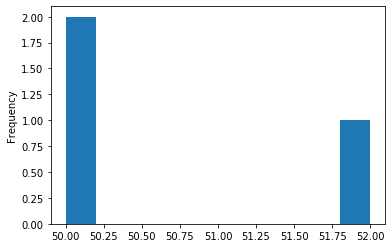

In [24]:
pd.value_counts(Iris_df["Species"]).plot(kind="hist")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

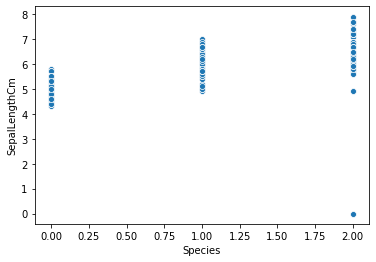

In [25]:
sns.scatterplot(x=Iris_df['Species'],y=Iris_df['SepalLengthCm'],data=Iris_df)
#SepalLength varies from Specie 0 to 2. Very significantly difference can be seen that as SepalLength increases, Specie varies
#but faint differences can only be seen
# This means, SepalLength is cannot be used as special property to define a specie. 
#We have one outlier for class 2 Specie where SepalLength is 0. 

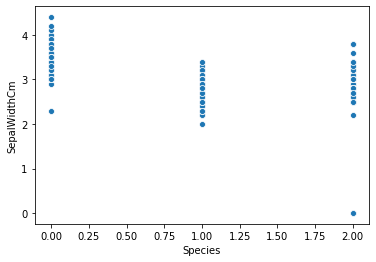

In [26]:
#Specie of class 2 has an outlier to 0. We have variation in the sepalWidth a bit different from length. Specie class 1 and 2
#have very near width to clearly classify the specie. Also for class 0, some values are higher to get the specie.
#We can say that SepalWidth is not very appropriate variable to decide the specie.
sns.scatterplot(x=Iris_df['Species'],y=Iris_df['SepalWidthCm'],data=Iris_df)

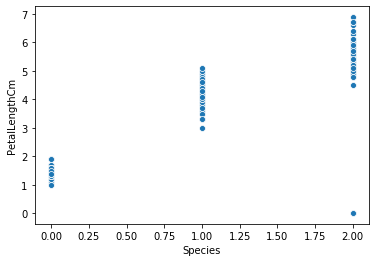

In [27]:
#PetalLength has an outlier for class 2. We can clearly differentiate between class 0 and 1 from graph to select specie
#but between 1 and 2, there are some values which seem very common in class 1 and 2. Hence, for classifying the specie, PetalLength
#can be chosen as one of the attribute.
sns.scatterplot(x=Iris_df['Species'],y=Iris_df['PetalLengthCm'],data=Iris_df)

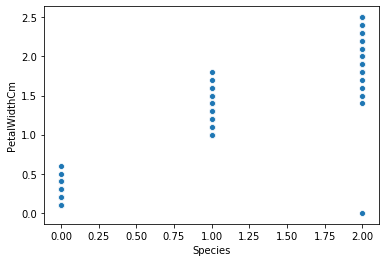

In [28]:
#PetalWidth has an outlier for class 2. We can clearly differentiate between class 0 and 1 from graph to select specie
#but between 1 and 2, there are some values which seem very common in class 1 and 2. Hence, for classifying the specie, PetalWidth
#can be chosen as one of the attribute.
sns.scatterplot(x=Iris_df['Species'],y=Iris_df['PetalWidthCm'],data=Iris_df)

### Summary Statistics and explain insights for at least 2 variables

In [29]:
#PetalLength has an outlier for class 2. We can clearly differentiate between class 0 and 1 from graph to select specie
#but between 1 and 2, there are some values which seem very common in class 1 and 2. Hence, for classifying the specie, PetalLength
#can be chosen as one of the attribute.

In [30]:
#SepalLength varies from Specie 0 to 2. Very significantly difference can be seen that as SepalLength increases, Specie varies
#but faint differences can only be seen
# This means, SepalLength is cannot be used as special property to define a specie. 
#We have one outlier for class 2 Specie where SepalLength is 0. 

### Correlation among all variables and give your insights

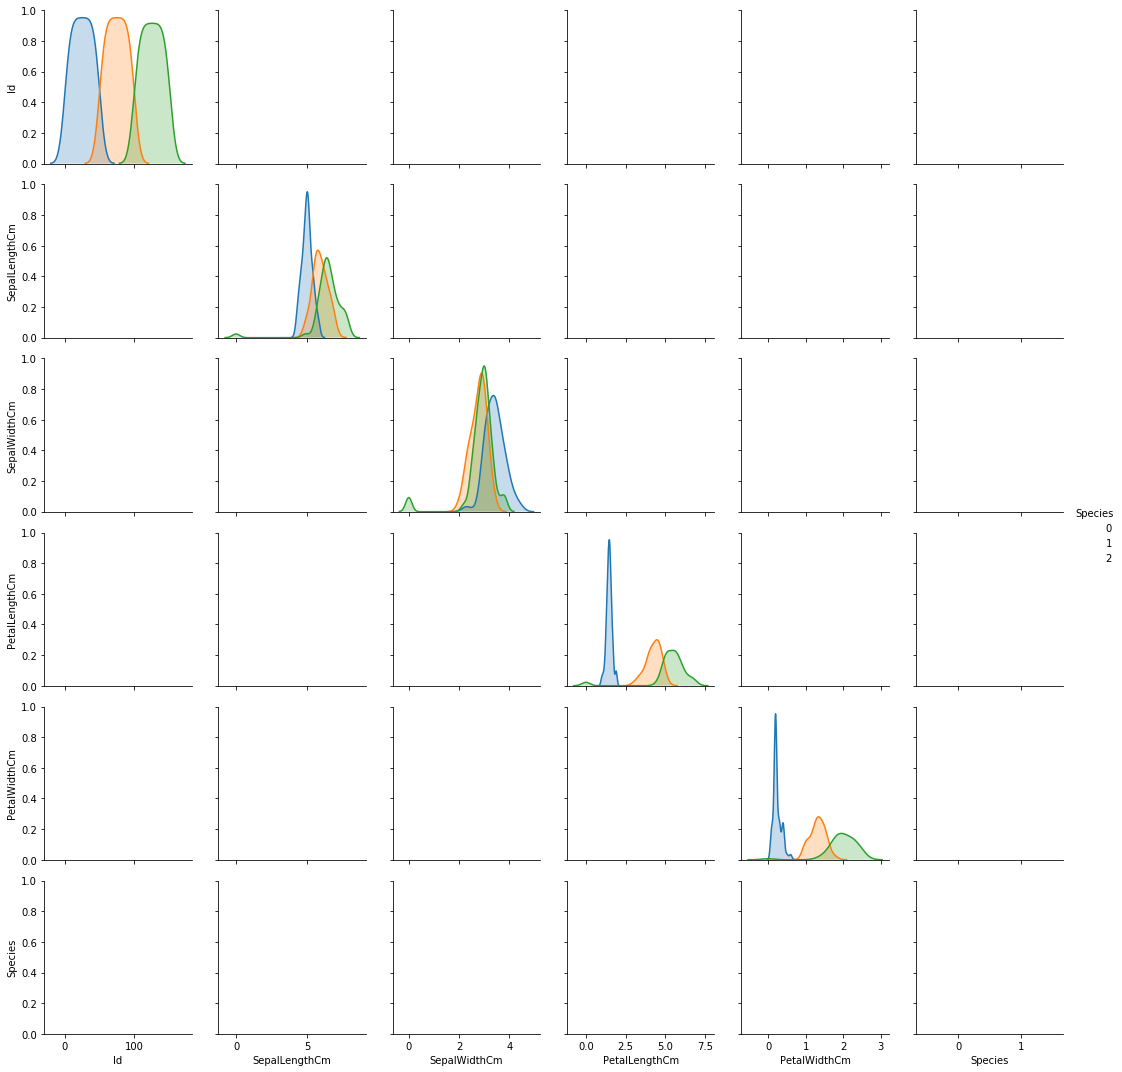

In [31]:
#Iris_df.corr()
sns.pairplot(Iris_df, hue='Species', kind='kde')
#1. We always have an outlier which can be excluded or replace with median
#2.PetalLength has an outlier for class 2. We can clearly differentiate between class 0 and 1 from graph to select specie
#but between 1 and 2, there are some values which seem very common in class 1 and 2. Hence, for classifying the specie, PetalLength
#can be chosen as one of the attribute.

### Split data in Training and Validation in 80:20

In [32]:
X_train_Iris,X_valid, y_train_Iris,y_valid=train_test_split(X,y,test_size=0.20,random_state=3)

### Do Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(Iris_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

### Train and Fit NaiveBayes Model

In [34]:
from sklearn.naive_bayes import GaussianNB
modelNB = GaussianNB()
modelNB.fit(X_train_Iris, y_train_Iris)

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
#Training the data set
X_train_Iris, X_test_Iris, y_train_Iris, y_test_Iris = train_test_split(X, y, test_size=0.20,random_state=2)
print("training set:::X_train***\n\n",X_train,"\n\n***y_train*****\n\n", y_train)
print("test dataset***\n\n", X_test,"\n\n******************",y_test)

training set:::X_train***

          school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
numbers                                                                        
10            0    0    0        1        0        1     4     4     4     1   
112           0    0    1        1        0        1     2     2     0     2   
338           0    0    3        1        1        1     3     3     3     3   
292           0    0    3        1        1        1     2     1     3     0   
305           0    0    3        1        0        1     2     4     3     0   
...         ...  ...  ...      ...      ...      ...   ...   ...   ...   ...   
299           0    1    3        1        1        1     4     4     4     4   
22            0    1    1        1        1        1     4     2     4     2   
72            0    0    0        0        0        1     1     1     2     2   
15            0    0    1        1        0        1     4     4     1     2   
168         

### Print Accuracy and Confusion Matrix and Conclude your findings

In [36]:
accuracy=modelNB.score(X_test_Iris, y_test_Iris)
accuracy

1.0

In [37]:
#Confusion Matrix
expected = y_test_Iris
predicted = modelNB.predict(X_test_Iris)

print(metrics.confusion_matrix(expected, predicted))

[[14  0  0]
 [ 0  9  0]
 [ 0  0  8]]


In [38]:
#True positive response says that we can have species specified to each class